In [64]:
import pandas as pd #took kit for dataframes

titanic = pd.read_csv("titanic_train.csv")

titanic.head(5)

print(titanic.describe()) #.decribe= pandas's tool for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame
#notice that count of ages < 891, meaning values are missing 

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [65]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median()) #.fillna fills in null values. here it filles with the median of age

print(titanic.describe()) #notice that age now has count of 891

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [66]:
print(titanic["Sex"].unique()) #list all the unique values of sex

titanic.loc[titanic["Sex"]=="male", "Sex"]=0 #use loc to set value for all items matching [male, sex]to be 0

titanic.loc[titanic["Sex"]=="female", "Sex"]=1 #use loc to set value for all items matching [female, sex] to be 1

['male' 'female']


In [67]:
print(titanic["Embarked"].unique())

['S' 'C' 'Q' nan]


In [68]:
#set null values of embarked to S, because S is the most frequent 
titanic["Embarked"]=titanic["Embarked"].fillna("S")

print(titanic["Embarked"].unique())

['S' 'C' 'Q']


In [69]:
titanic.loc[titanic["Embarked"]=='S', "Embarked"]=0 #set value for all items matching [S, embarked] to be 0

titanic.loc[titanic["Embarked"]=="C", "Embarked"]=1 #set value for all items matching [C, embarked] to be 1

titanic.loc[titanic["Embarked"]=="Q", "Embarked"]=2 #set value for all items matching [Q, embarked] to be 2

In [70]:
from sklearn.linear_model import LogisticRegression #first to try with logistic regression 
from sklearn.model_selection import StratifiedKFold,cross_val_score 

predictors=["Pclass", "Sex","Age","SibSp", "Parch", "Fare", "Embarked"]

alg=LogisticRegression()

strKFold = StratifiedKFold(n_splits=3,shuffle=False,random_state=0) # use StratifiedKFold as the method of cross validation

scores = cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=strKFold)

print("straitified cross validation scores:{}".format(scores)) #.format(values) put values into strings

print("Mean score of straitified cross validation:{:.2f}".format(scores.mean()))


straitified cross validation scores:[0.79124579 0.79461279 0.8013468 ]
Mean score of straitified cross validation:0.80


/Users/aa367698/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/aa367698/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/aa367698/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STO

In [71]:
titanic_test=pd.read_csv("test.csv")

titanic_test["Age"]=titanic_test["Age"].fillna(titanic_test["Age"].median()) #fill in age null with median of age

titanic_test["Fare"]=titanic_test["Fare"].fillna(titanic_test["Fare"].median()) #fill in fare null with median of age

titanic_test.loc[titanic_test["Sex"]=="male", "Sex"]=0 #set value for all males in SEX to be 0

titanic_test.loc[titanic_test["Sex"]=="female", "Sex"]=1 #set value for all males in SEX to be 1

titanic_test["Embarked"]=titanic_test["Embarked"].fillna("S")

titanic_test.loc[titanic_test["Embarked"]=="S", "Embarked"]=0
titanic_test.loc[titanic_test["Embarked"]=="C", "Embarked"]=1
titanic_test.loc[titanic_test["Embarked"]=="Q", "Embarked"]=2

In [72]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,cross_val_score 

predictors=["Pclass", "Sex","Age","SibSp", "Parch", "Fare", "Embarked"] #notice that predictors are not filtered. Pclass and Fare are atucatlly highly related.

alg=RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1) #roughly set the parameters of RandomForestClassifier
strKFold = StratifiedKFold(n_splits=3,shuffle=False,random_state=0)

scores=cross_val_score(alg, titanic[predictors],titanic["Survived"], cv=strKFold)

print(scores.mean()) #the result is not improved compared to the result of logisticregresion, meaning the parameters need to be adjusted 

0.8013468013468014


/Users/aa367698/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [73]:
alg=RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=4, min_samples_leaf=2) # increase #of estimator and limit the depth of the trees

strKFold = StratifiedKFold(n_splits=3,shuffle=False,random_state=0)

scores=cross_val_score(alg, titanic[predictors],titanic["Survived"], cv=strKFold)

print(scores.mean()) 

/Users/aa367698/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8226711560044894


In [75]:
alg.fit(titanic[predictors], titanic["Survived"])
predictions = alg.predict(titanic_test[predictors])

result = pd.DataFrame({'PassengerId':titanic_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("random_forest_predictions.csv", index=False)
print(pd.read_csv("random_forest_predictions.csv"))

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


/Users/aa367698/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [54]:
#now make some new predictors 

titanic["FamilySize"]=titanic["SibSp"]+titanic["Parch"]  #generate a falimysize column

titanic["NameLength"]=titanic["Name"].apply(lambda x: len(x)) #generate a namelength column # The .apply method generates a new series of len(x) where x is the names

In [55]:
#now get the titles and count 
#re is useful method to extract contents from text
import re 

#first, define a function that extract title from x
def get_title(name):
    title_search= re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1) #.group(1) resturns The first parenthesized subgroup.
    return ""

titles=titanic["Name"].apply(get_title) #apply the get_title function to "Name" colume

print(pd.value_counts(titles)) #check the frequency of each title

#generate a dictionary of title_mapping {"k":v}  where k= keys; v=values 
title_mapping = {"Mr":1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k, v in title_mapping.items(): 
    titles[titles==k]=v
    
print(pd.value_counts(titles)) #check that all the titles are converted to values

titanic["Title"]=titles #add the converted titles as a column to the dataframe
    




Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Sir           1
Mme           1
Jonkheer      1
Countess      1
Capt          1
Don           1
Ms            1
Lady          1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64


SelectKBest(k=5, score_func=<function f_classif at 0x1a1a7254d0>)


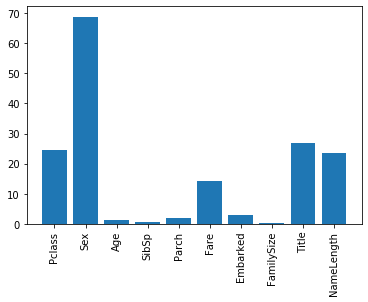

KeyError: "['Title'] not in index"

In [61]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif #selectkbest=Select features according to the k highest scores. f_classif=Compute the ANOVA F-value for the provided sample.
import matplotlib.pyplot as plt

#print(titanic.describe()) to verify the column names are correct
predictors=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]
selector=SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"]) #.fit(X,y)

print(selector)

#in SKlearn, .pvalues_ can get you p value
scores=-np.log10(selector.pvalues_) #0<=pvalues<=1, therefore log10(pvalues)<0, therefore need "-"

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation="vertical")
plt.show()

#pick the best predictors
predictors=["Pclass", "Sex", "Fare", "Title"]

alg=RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)

alg.fit(titanic[predictors], titanic["Survived"])
predictions = alg.predict(titanic_test[predictors])
result = pd.DataFrame({'PassengerId':titanic_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("random_forest_predictions.csv", index=False)
print(pd.read_csv("random_forest_predictions.csv"))


TypeError: fit() got an unexpected keyword argument 'max_iter'